# Interacting Gravitational Shocks In Vacuum Plane Symmetric Cosmologies by Centrella
##  Geoff Cope
##  Univeristy of Utah
##  December 25, 2021

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.25.930

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
T,z,x,y,dT,dz,dx,dy = symbols( 'T z x y dT dz dx dy' ) 

In [6]:
gamma = Function('gamma')(T,z)
gamma

In [7]:
psi = Function('psi')(T,z)
psi

In [8]:
variables = Matrix( [T,z,x,y] )
variables

⎡T⎤
⎢ ⎥
⎢z⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [9]:
differentials = Matrix( [dT,dz,dx,dy] ) 
differentials

⎡dT⎤
⎢  ⎥
⎢dz⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [11]:
lineElement = expand(exp(gamma-psi) * ( -dT**2 + dz**2 ) + ( exp(psi)*dx**2 + T**2 * exp(-psi) * dy**2 ) )
lineElement 

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  γ(T, z)  -ψ(T, z)                                            ⎤
⎢-ℯ       ⋅ℯ                  0              0           0      ⎥
⎢                                                               ⎥
⎢                      γ(T, z)  -ψ(T, z)                        ⎥
⎢         0           ℯ       ⋅ℯ             0           0      ⎥
⎢                                                               ⎥
⎢                                          ψ(T, z)              ⎥
⎢         0                   0           ℯ              0      ⎥
⎢                                                               ⎥
⎢                                                    2  -ψ(T, z)⎥
⎣         0                   0              0      T ⋅ℯ        ⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡  γ(T, z)  -ψ(T, z)                                            ⎤
⎢-ℯ       ⋅ℯ                  0              0           0      ⎥
⎢                                                               ⎥
⎢                      γ(T, z)  -ψ(T, z)                        ⎥
⎢         0           ℯ       ⋅ℯ             0           0      ⎥
⎢                                                               ⎥
⎢                                          ψ(T, z)              ⎥
⎢         0                   0           ℯ              0      ⎥
⎢                                                               ⎥
⎢                                                    2  -ψ(T, z)⎥
⎣         0                   0              0      T ⋅ℯ        ⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("T z x y")
T,z,x,y = syms

In [17]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(T, z))   ──(ψ(T, z))  ──(γ(T, z))   ──(ψ(T, z))                                      
⎢⎢∂T            ∂T           ∂z            ∂z                                               
⎢⎢─────────── - ───────────  ─────────── - ───────────                  0                   
⎢⎢     2             2            2             2                                           
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(T, z))   ──(ψ(T, z))  ──(γ(T, z))   ──(ψ(T, z))                                      
⎢⎢∂z            ∂z           ∂T            ∂T                                               
⎢⎢─────────── - ───────────  ─────────── - ───────────                  0                   
⎢⎢     2             2            2             2                     

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛    2              2                         2     2              2         ⎞           
⎢  ⎜   ∂              ∂             ⎛∂          ⎞     ∂              ∂          ⎟   ∂       
⎢T⋅⎜- ───(γ(T, z)) + ───(γ(T, z)) - ⎜──(ψ(T, z))⎟  + ───(ψ(T, z)) - ───(ψ(T, z))⎟ + ──(γ(T, 
⎢  ⎜    2              2            ⎝∂T         ⎠      2              2         ⎟   ∂T      
⎢  ⎝  ∂T             ∂z                              ∂T             ∂z          ⎠           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                    2⋅T                                    
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                     ∂           ∂             ∂     

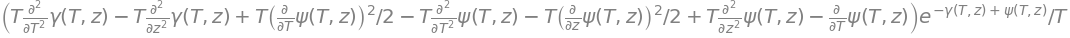

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [22]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢  ⎛    2              2                         2     2              2         ⎞           
⎢  ⎜   ∂              ∂             ⎛∂          ⎞     ∂              ∂          ⎟   ∂       
⎢T⋅⎜- ───(γ(T, z)) + ───(γ(T, z)) - ⎜──(ψ(T, z))⎟  + ───(ψ(T, z)) - ───(ψ(T, z))⎟ + ──(γ(T, 
⎢  ⎜    2              2            ⎝∂T         ⎠      2              2         ⎟   ∂T      
⎢  ⎝  ∂T             ∂z                              ∂T             ∂z          ⎠           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                    2⋅T                                    
⎢                                                                                           
⎢                                                                     

In [23]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()